## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, we'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

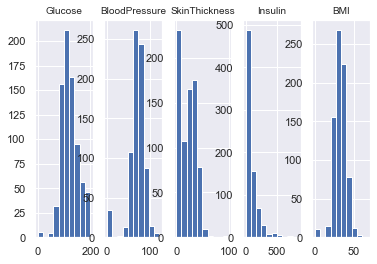

In [19]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] 
for i , col in enumerate(cols):
    plt.subplot(1,5,i+1)
    diabetes_data[col].hist()
    plt.title(col, fontsize=10)

#### Plot the correlation matrix heatmap

Correlation between various features


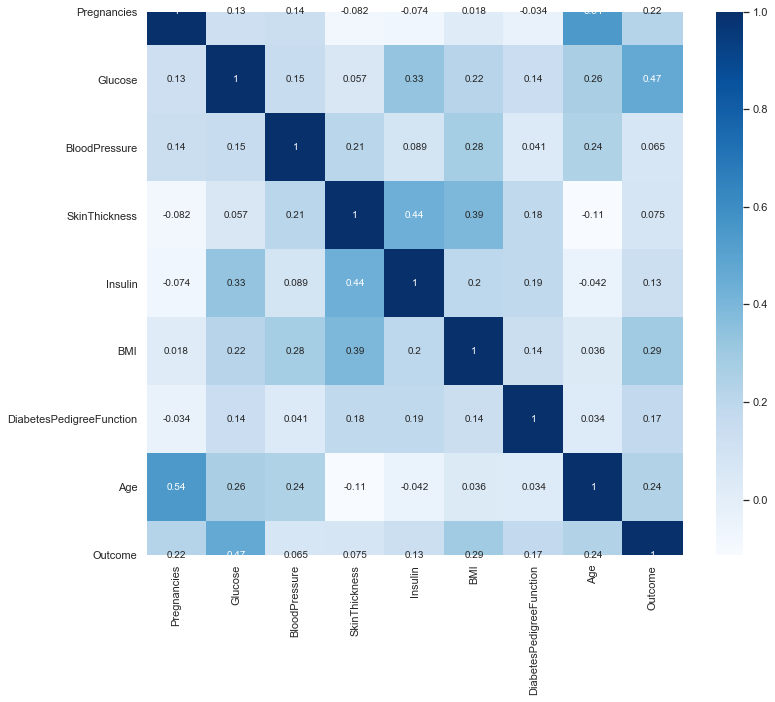

In [20]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

In [22]:
y=diabetes_data['Outcome']
X=diabetes_data.drop('Outcome', axis=1)

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model=scaler.fit(X_train)
model.transform(X_test)

array([[ 0.69748316, -0.70719864, -0.64639893, ...,  0.26575953,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563, ...,  0.488933  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, ..., -0.1543317 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.19037303,  0.57058226, ...,  0.56770011,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.49054341,  0.01740899, ..., -0.1543317 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.35716433,  0.68121692, ...,  0.50206085,
        -0.91851573,  0.16493409]])

#### Apply the KNearestNeighbor classifier to classify the the data.

In [26]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [29]:
print(test_scores)
      
print(train_scores)

[0.6883116883116883, 0.7272727272727273, 0.6753246753246753, 0.7229437229437229, 0.6883116883116883, 0.7012987012987013, 0.6926406926406926, 0.7142857142857143, 0.7012987012987013]
[1.0, 0.8417132216014898, 0.8435754189944135, 0.8119180633147114, 0.8026070763500931, 0.7951582867783985, 0.8007448789571695, 0.7895716945996276, 0.7895716945996276]


**<font color='teal'>The number of neighbors that resulted in the max score in the training dataset. </font>**

In [38]:
np.max(train_scores[train_scores!=1.0])

0.8417132216014898

**<font color='teal'> The number of neighbors that resulted in the max score in the testing dataset. </font>**

In [40]:
np.max(test_scores[test_scores!=1.0])

0.7272727272727273

Plot the train and test model performance by number of neighbors.

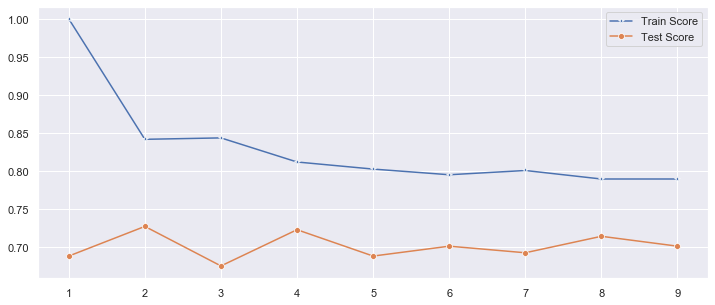

In [41]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [34]:
model=K

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [42]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. 

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [44]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578125
Best Parameters: {'n_neighbors': 14}


Here we can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'>Apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [47]:
from sklearn.ensemble import RandomForestClassifier 
param_grid={'n_estimators':np.arange(1,50)}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid, cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
print('Best score:'+ str(rf_cv.best_score_))
print('Best parameters:'+ str(rf_cv.best_params_))

Best score:0.7747395833333334
Best parameters:{'n_estimators': 36}
